<a href="https://colab.research.google.com/github/Code-Abbey/Logistic-Regression/blob/main/Titanic_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic Disaster Survival using Logistic Regression**

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Load the Data**

In [ ]:
#Load Data
import requests
url = 'https://raw.githubusercontent.com/sumitprakashdubey/Logistic-Regression/main/titanic_train.csv'
res = requests.get(url, allow_redirects=True)
with open('titanic_train.csv','wb') as file:
    file.write(res.content)
titanic_data = pd.read_csv('titanic_train.csv')

In [ ]:
len(titanic_data)

891

View the Data useing the Head function which will returns the top rows 

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.index

RangeIndex(start=0, stop=891, step=1)

In [8]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **Explaining Dataset**

survival : Survival 0 = No, 1 = Yes
pdclass : Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
sex : Sex
Age : Age in years
sibsp : Number of siblings / spouses abroad the Titanic
parch # of parents / children abroad the Titanic
ticket : Ticket number fare Passenger fare cabin  Cabin number
embarked : Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
# **Data Analysis**
**Import Seaborn for visually analysing data. Find out how many survied vs Died using countplot method of seaboarn**

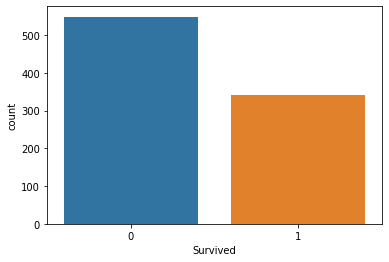

In [13]:
#countplot of survived vs not survived
sns.countplot(x='Survived',data=titanic_data)

# **Male vs Female Survival**

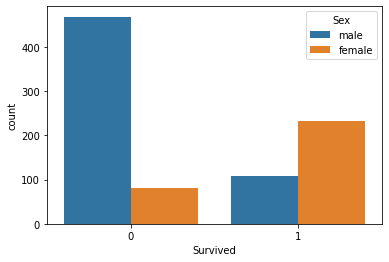

In [14]:
#Male vs Female Survived?
sns.countplot(x='Survived',data=titanic_data,hue='Sex')

# **See age group of passengers travelled**
Note: I used displot method to see the histogram. However some records does not have age hence the method wil throw an error. In order to avoid that i will use Dropna method to eliminate null values from graph.

In [15]:
#Check for null
titanic_data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
#Check how many values are null
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

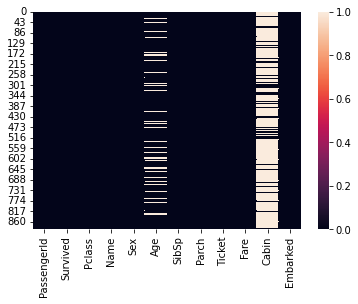

In [17]:
#Visualize null values
sns.heatmap(titanic_data.isna())

In [18]:
#find the % of null values in Age column
(titanic_data['Age'].isna().sum()/len(titanic_data['Age']))*100

19.865319865319865

In [20]:
#find the % of null values in Cabin column
(titanic_data['Cabin'].isna().sum()/len(titanic_data['Cabin']))*100

77.10437710437711

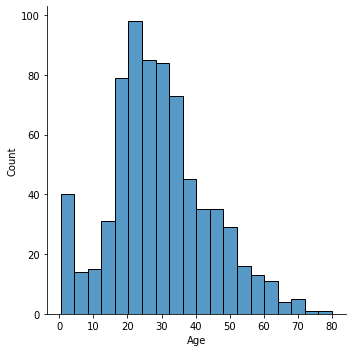

In [21]:
#find the distribution for the Age column
sns.displot(x='Age',data=titanic_data)

# **Data Cleaning**
**Fill the missing values**
I will be filling the missing values for Age. In order to fill missing values i used fillna method.
Filling the missing age by taking average of all age

In [22]:
#fill Age column
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [23]:
#Verify null value
titanic_data['Age'].isna().sum() 

0

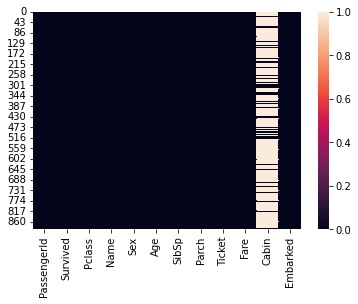

In [24]:
#visualize null value using heatmap
sns.heatmap(titanic_data.isna())

**Column has a number of null values, as such can not use for prediction. Hence i will drop it**

In [25]:
#Drop Cabin column
titanic_data.drop('Cabin',axis=1,inplace=True)

In [26]:
#see the contents of the data
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# **Preparing Data for Model**
Convert all non-numerical columns to numeric. First is to check for columns that are non-numeric through info describe method

In [27]:
#check for non-numeric column
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [28]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

**Name, Sex, Ticket and Embarked are non-numerical.It seems Name,Embarked and Ticket number are not useful for Machine Learning Prediction hence we will eventually drop it. Convert Sex Column to dummies numerical values**

In [29]:
#Convert sex column to numerical values
gender=pd.get_dummies(titanic_data['Sex'],drop_first=True)

In [30]:
titanic_data['Gender']=gender

In [31]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [32]:
#drop the columns not required 
titanic_data.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [33]:
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


In [34]:
#Seperate Dependant and Independent variables
x=titanic_data[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Gender']]
y=titanic_data['Survived']

In [35]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# **Data Modelling**
**Building Model using Logestic Regression**
**Build the model**

In [36]:
#Import train split method
from sklearn.model_selection import train_test_split

In [37]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

In [38]:
#import Logistic Regression
from sklearn.linear_model import LogisticRegression

In [39]:
#fit Logistic Regression
lr=LogisticRegression()

In [40]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [41]:
#Predict
predict=lr.predict(x_test)

**Testing**
Let's see how our model is performing

In [42]:
#Print Confusion Matrix
from sklearn.metrics import confusion_matrix

In [44]:
pd.DataFrame(confusion_matrix(y_test,predict), columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,152,23
Actual Yes,37,83


In [45]:
#Import Classification report
from sklearn.metrics import  classification_report

In [46]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       175
           1       0.78      0.69      0.73       120

    accuracy                           0.80       295
   macro avg       0.79      0.78      0.78       295
weighted avg       0.80      0.80      0.79       295

